<h2 align="center">INF575 - Fuzzy Logic</h2>
<h1 align="center">Segmentation of HER2 Overexpression in Histopathology Images with Fuzzy Decision Tree<h1>
    
<center>
    <img src="https://rochepacientes.es/content/dam/roche-pacientes-2/es/assets/images/que-es-her2.jpg" width="60%"/>
</center>

<h2 align="center">HER2 Membranae Segmentation with Fuzzy Decision Tree</h2>

<center>
<i> Sebastián Bórquez G. - <a href="mailto://sebastian.borquez.g@gmail.com">sebastian.borquez.g@gmail.com</a> - DI UTFSM - August 2020.</i>
</center>

In [1]:
%cd ..

/mnt/d/sebas/Desktop/her2_FL


In [2]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
from load_features import *
from fuzzy import *
from fuzzy_tree import *
from tqdm.notebook import tqdm as tqdm_notebook
from sklearn.metrics import classification_report

## Load Features

In [3]:
selected_features = [
 'mean_rawblue', 
 'mean_dab',
 'mean_intentsity',
 'mean_rawgreen',
 'mean_eosin',
 'mean_vertical',
 'mean_rawbred',
 'homogeneity_vertical',
 'mean_hematoxylin',
 'sobel_magnitud'
]

print(len(selected_features))

10


In [4]:
train_csv_files = [
    "./data/1+_2.csv",
    "./data/1+_20.csv",
    "./data/2+_1.csv",
    "./data/2+_8.csv",
    "./data/3+_16.csv",
    "./data/3+_15.csv",
]
train_features = merge_features([load_features(csv_file, selected_features=selected_features) for csv_file in train_csv_files])
(feature_names, target_col), (train_X, train_y) = split_features_target(train_features)

In [5]:
train_features[selected_features].describe()

,mean_rawblue,mean_dab,mean_intentsity,mean_rawgreen,mean_eosin,mean_vertical,mean_rawbred,homogeneity_vertical,mean_hematoxylin,sobel_magnitud
count,5.982699e+06,5.982699e+06,5.982699e+06,5.982699e+06,5.982699e+06,5.982699e+06,5.982699e+06,5.982699e+06,5.982699e+06,5.982699e+06
mean,1.611332e+02,1.150898e+02,1.704707e+02,1.693916e+02,1.348134e+02,4.224242e+01,1.760577e+02,5.593412e-01,9.596972e+01,8.004122e+00
std,6.743761e+01,3.292316e+01,5.611982e+01,5.774730e+01,6.247506e+00,1.387242e+01,5.008546e+01,1.910922e-01,2.058120e+01,8.583610e+00
min,0.000000e+00,6.700000e+01,1.000000e+01,8.000000e+00,1.050000e+02,2.300000e+00,9.000000e+00,9.023163e-03,4.100000e+01,0.000000e+00
25%,1.390000e+02,9.100000e+01,1.570000e+02,1.570000e+02,1.320000e+02,3.912500e+01,1.610000e+02,4.300000e-01,8.200000e+01,3.000000e+00
50%,1.840000e+02,1.030000e+02,1.880000e+02,1.890000e+02,1.360000e+02,4.672500e+01,1.900000e+02,5.750000e-01,9.100000e+01,5.000000e+00
75%,2.090000e+02,1.270000e+02,2.070000e+02,2.070000e+02,1.390000e+02,5.125000e+01,2.090000e+02,7.000000e-01,1.030000e+02,1.000000e+01
max,2.550000e+02,2.090000e+02,2.540000e+02,2.550000e+02,1.510000e+02,6.282500e+01,2.550000e+02,1.000000e+00,1.850000e+02,8.000000e+01


In [6]:
#for feature in selected_features:
#    plt.title(feature)
#    train_features[feature].hist()
#    plt.show()

## Define $\mu_{A_i, m}(x)$

In [7]:
features_fuzzy_sets = {
 'mean_rawblue': build_3_trapezoidal(["low", "medium", "high"], 51, 102, 153, 204),
 'mean_rawgreen': build_3_trapezoidal(["low", "medium", "high"], 51, 102, 153, 204),
 'mean_rawbred': build_3_trapezoidal(["low", "medium", "high"], 51, 102, 153, 204),
 'mean_vertical':    build_3_trapezoidal(["low", "medium", "high"], 20,38, 46, 52),
 'mean_dab': build_3_triangular(["low", "medium", "high"], 64, 127, 192),
 'mean_eosin': build_3_triangular(["low", "medium", "high"], 64, 127, 192),
 'mean_hematoxylin': build_3_triangular(["low", "medium", "high"], 64, 127, 192),
 'homogeneity_vertical': build_3_triangular(["low", "medium", "high"], 0.25, 0.5, 0.75),
 'mean_intentsity': build_2_sigma(["low", "high"], 64, 192),
 'sobel_magnitud': build_2_sigma(["low", "high"], 1, 5),
}

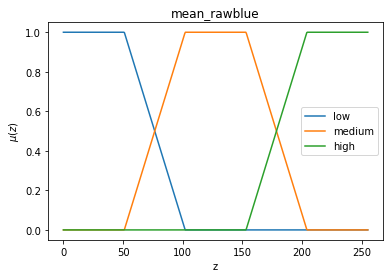

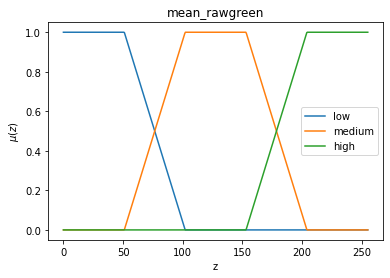

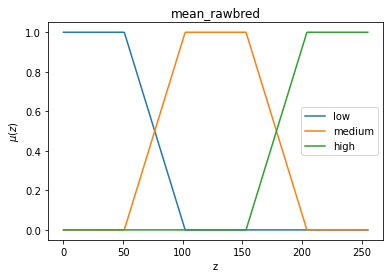

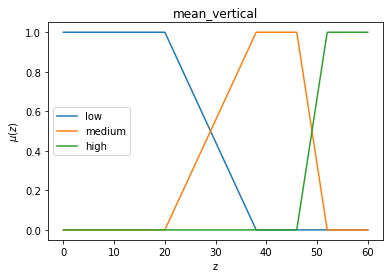

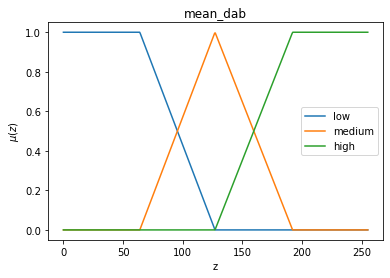

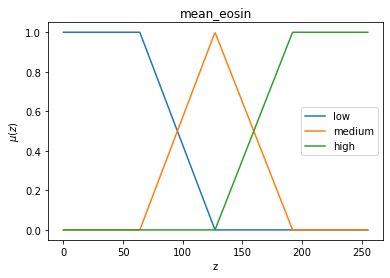

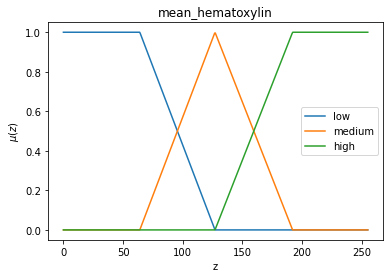

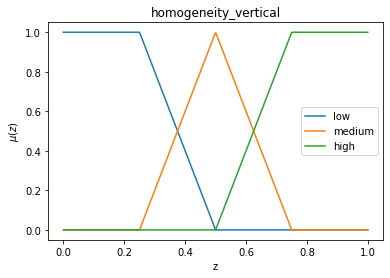

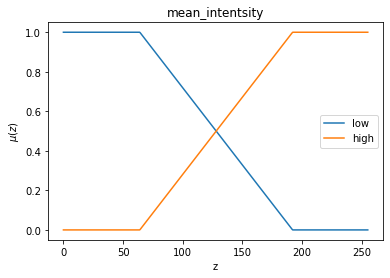

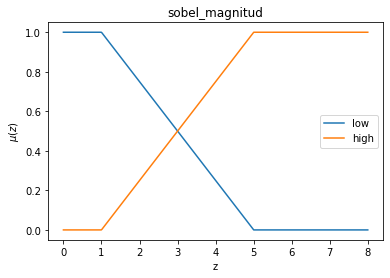

In [8]:
for feature, fuzzy_sets in features_fuzzy_sets.items():
    ranges = {'homogeneity_vertical': (0, 1), 'mean_vertical': (0, 60), "sobel_magnitud": (0,8)}.get(feature, (0, 255))
    show_fuzzy_set(feature, fuzzy_sets, ranges=ranges)
    

## Train Tree Class Weight

In [9]:
target_names = ["non-overexpressed", "overexpressed"]
target_name_ratio={'non-overexpressed':0.936349, 'overexpressed':0.063651}
feature_names

['mean_rawblue',
 'mean_intentsity',
 'mean_rawbred',
 'mean_vertical',
 'mean_rawgreen',
 'sobel_magnitud',
 'mean_dab',
 'mean_eosin',
 'mean_hematoxylin',
 'homogeneity_vertical']

In [24]:
tree = build_fuzzy_tree(train_X, train_y,
            feature_names,
            target_names,
            features_fuzzy_sets,
            max_deep=4,
            theta_r=0.98,
            theta_n=15,
            target_name_ratio=target_name_ratio
)

In [25]:
rules = tree_to_rules(tree, target_names)
print(len(rules))
print(*rules, sep="\n")

126
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred" IS "low") AND ("homogeneity_vertical" IS "low") AND ("mean_hematoxylin" IS "low") AND ("mean_dab" IS "high")), THEN IS "overexpressed"
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred" IS "low") AND ("homogeneity_vertical" IS "low") AND ("mean_hematoxylin" IS "medium") AND ("mean_eosin" IS "low")), THEN IS "overexpressed"
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred" IS "low") AND ("homogeneity_vertical" IS "low") AND ("mean_hematoxylin" IS "medium") AND ("mean_eosin" IS "medium")), THEN IS "overexpressed"
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred" IS "low") AND ("homogeneity_vertical" IS "low") AND ("mean_hematoxylin" IS "medium") AND ("mean_eosin" IS "high")), THEN IS "overexpressed"
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred" IS "low") AND ("homogeneity_vertical" IS "low") AND ("mean_hematoxylin" IS "high") AND ("mean_eosin" IS "low")), THEN IS "overexpressed"
IF (("mean_rawgreen" IS "low") AND ("mean_rawbre

In [26]:
possitive_rules = list(filter(lambda r: '"overexpressed"' in r, rules))
print(len(possitive_rules))
print(*possitive_rules, sep="\n")

46
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred" IS "low") AND ("homogeneity_vertical" IS "low") AND ("mean_hematoxylin" IS "low") AND ("mean_dab" IS "high")), THEN IS "overexpressed"
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred" IS "low") AND ("homogeneity_vertical" IS "low") AND ("mean_hematoxylin" IS "medium") AND ("mean_eosin" IS "low")), THEN IS "overexpressed"
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred" IS "low") AND ("homogeneity_vertical" IS "low") AND ("mean_hematoxylin" IS "medium") AND ("mean_eosin" IS "medium")), THEN IS "overexpressed"
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred" IS "low") AND ("homogeneity_vertical" IS "low") AND ("mean_hematoxylin" IS "medium") AND ("mean_eosin" IS "high")), THEN IS "overexpressed"
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred" IS "low") AND ("homogeneity_vertical" IS "low") AND ("mean_hematoxylin" IS "high") AND ("mean_eosin" IS "low")), THEN IS "overexpressed"
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred

In [27]:
show_tree(tree, target_names)

  mean_rawgreen:
	 [low]-> mean_rawbred:
		 [low]-> homogeneity_vertical:
			 [low]-> mean_hematoxylin:
				 [low]-> mean_dab:
					 [high]-> {'non-overexpressed': 0.25, 'overexpressed': 0.75}
				 [medium]-> mean_eosin:
					 [low]-> {'non-overexpressed': 0.07, 'overexpressed': 0.93}
					 [medium]-> {'non-overexpressed': 0.1, 'overexpressed': 0.9}
					 [high]-> {'non-overexpressed': 0.24, 'overexpressed': 0.76}
				 [high]-> mean_eosin:
					 [low]-> {'non-overexpressed': 0.04, 'overexpressed': 0.96}
					 [medium]-> {'non-overexpressed': 0.06, 'overexpressed': 0.94}
					 [high]-> {'non-overexpressed': 1.0, 'overexpressed': 0.0}
			 [medium]-> mean_hematoxylin:
				 [low]-> mean_dab:
					 [high]-> {'non-overexpressed': 0.29, 'overexpressed': 0.71}
				 [medium]-> mean_dab:
					 [low]-> {'non-overexpressed': 1.0, 'overexpressed': 0.0}
					 [medium]-> {'non-overexpressed': 0.06, 'overexpressed': 0.94}
					 [high]-> {'non-overexpressed': 0.09, 'overexpressed': 0.91}
				 [high]-> 

					 [low]-> {'non-overexpressed': 0.94, 'overexpressed': 0.06}
					 [medium]-> {'non-overexpressed': 0.88, 'overexpressed': 0.12}
					 [high]-> {'non-overexpressed': 0.63, 'overexpressed': 0.37}
				 [high]-> sobel_magnitud:
					 [low]-> {'non-overexpressed': 0.98, 'overexpressed': 0.02}
					 [high]-> {'non-overexpressed': 0.95, 'overexpressed': 0.05}
		 [high]-> homogeneity_vertical:
			 [low]-> mean_vertical:
				 [low]-> {'non-overexpressed': 1.0, 'overexpressed': 0.0}
				 [medium]-> mean_dab:
					 [low]-> {'non-overexpressed': 0.9, 'overexpressed': 0.1}
					 [medium]-> {'non-overexpressed': 0.85, 'overexpressed': 0.15}
				 [high]-> mean_dab:
					 [low]-> {'non-overexpressed': 0.96, 'overexpressed': 0.04}
					 [medium]-> {'non-overexpressed': 0.94, 'overexpressed': 0.06}
					 [high]-> {'non-overexpressed': 1.0, 'overexpressed': 0.0}
			 [medium]-> mean_vertical:
				 [medium]-> mean_dab:
					 [low]-> {'non-overexpressed': 0.96, 'overexpressed': 0.04}
					 [medium]-> {

## Evaluate

In [28]:
test_csv_files = [
    "./data/1+_25.csv",
    "./data/2+_9.csv",
    "./data/3+_15.csv",
]
test_features = merge_features([load_features(csv_file, selected_features=selected_features) for csv_file in test_csv_files])
test_X, test_y = split_features_target(test_features, only_data=True)

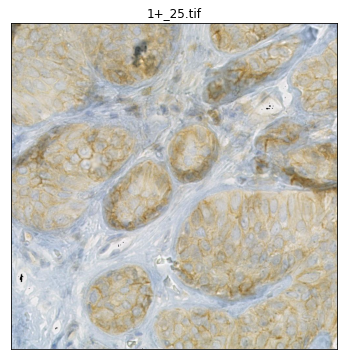

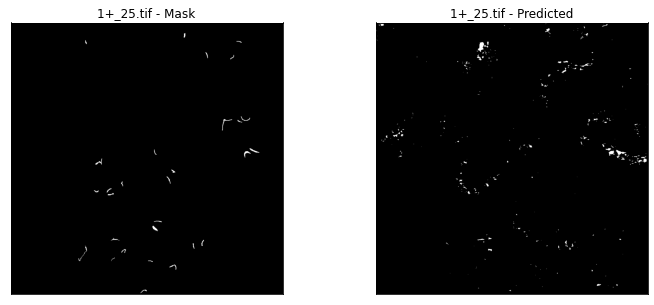

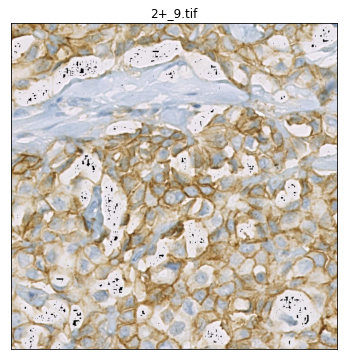

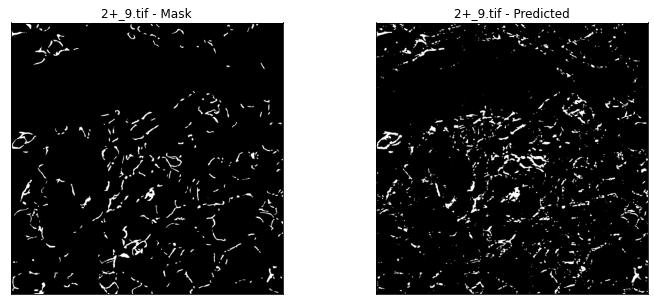

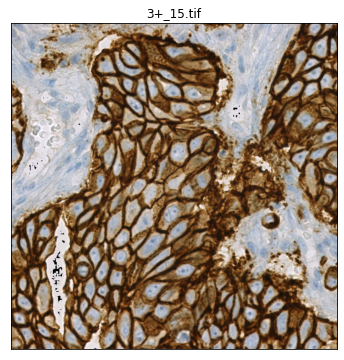

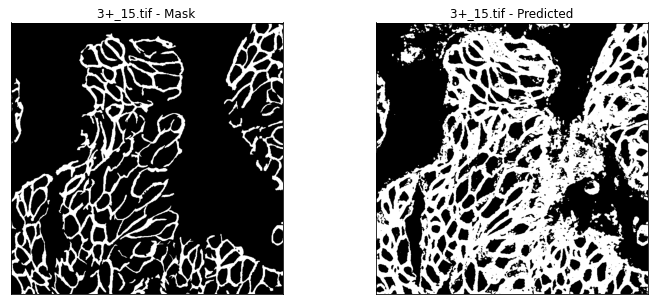

In [29]:
test_images = test_features.image.unique()
f_predicted = []
for test_image in test_images:
    image_features = test_features[test_features.image == test_image]
    test_X_i, test_y_i = split_features_target(image_features, True)
    f_predicted_i = predict(tree, test_X_i, features_fuzzy_sets, feature_names, target_names, tqdm_notebook)
    f_predicted.append(f_predicted_i)
    show_images_and_masks(test_image, image_features, f_predicted_i)
    plt.show()
f_predicted = np.hstack(f_predicted)

In [30]:
results=pd.DataFrame({
    "target": test_y.astype(int),
    "fuzzy": f_predicted.astype(int),
})
results.to_csv("fuzzy_results.csv", index=False)

In [31]:
print("Fuzzy Decision Tree")
print(classification_report(results["target"], results["fuzzy"], target_names=["non-overexpression", "overexpression"]))

Fuzzy Decision Tree
                    precision    recall  f1-score   support

non-overexpression       0.99      0.88      0.93   2781471
    overexpression       0.37      0.93      0.53    211306

          accuracy                           0.88   2992777
         macro avg       0.68      0.90      0.73   2992777
      weighted avg       0.95      0.88      0.91   2992777



## No Class Weight

In [32]:
tree_2 = build_fuzzy_tree(train_X, train_y,
            feature_names,
            target_names,
            features_fuzzy_sets,
            max_deep=4,
            theta_r=0.98,
            theta_n=15,
            target_name_ratio={'non-overexpressed': 1, 'overexpressed': 1}
)

In [33]:
rules = tree_to_rules(tree, target_names)
print(len(rules))
print(*rules, sep="\n")

126
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred" IS "low") AND ("homogeneity_vertical" IS "low") AND ("mean_hematoxylin" IS "low") AND ("mean_dab" IS "high")), THEN IS "overexpressed"
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred" IS "low") AND ("homogeneity_vertical" IS "low") AND ("mean_hematoxylin" IS "medium") AND ("mean_eosin" IS "low")), THEN IS "overexpressed"
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred" IS "low") AND ("homogeneity_vertical" IS "low") AND ("mean_hematoxylin" IS "medium") AND ("mean_eosin" IS "medium")), THEN IS "overexpressed"
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred" IS "low") AND ("homogeneity_vertical" IS "low") AND ("mean_hematoxylin" IS "medium") AND ("mean_eosin" IS "high")), THEN IS "overexpressed"
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred" IS "low") AND ("homogeneity_vertical" IS "low") AND ("mean_hematoxylin" IS "high") AND ("mean_eosin" IS "low")), THEN IS "overexpressed"
IF (("mean_rawgreen" IS "low") AND ("mean_rawbre

In [34]:
possitive_rules = list(filter(lambda r: '"overexpressed"' in r, rules))
print(len(possitive_rules))
print(*possitive_rules, sep="\n")

46
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred" IS "low") AND ("homogeneity_vertical" IS "low") AND ("mean_hematoxylin" IS "low") AND ("mean_dab" IS "high")), THEN IS "overexpressed"
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred" IS "low") AND ("homogeneity_vertical" IS "low") AND ("mean_hematoxylin" IS "medium") AND ("mean_eosin" IS "low")), THEN IS "overexpressed"
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred" IS "low") AND ("homogeneity_vertical" IS "low") AND ("mean_hematoxylin" IS "medium") AND ("mean_eosin" IS "medium")), THEN IS "overexpressed"
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred" IS "low") AND ("homogeneity_vertical" IS "low") AND ("mean_hematoxylin" IS "medium") AND ("mean_eosin" IS "high")), THEN IS "overexpressed"
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred" IS "low") AND ("homogeneity_vertical" IS "low") AND ("mean_hematoxylin" IS "high") AND ("mean_eosin" IS "low")), THEN IS "overexpressed"
IF (("mean_rawgreen" IS "low") AND ("mean_rawbred

In [35]:
show_tree(tree, target_names)

  mean_rawgreen:
	 [low]-> mean_rawbred:
		 [low]-> homogeneity_vertical:
			 [low]-> mean_hematoxylin:
				 [low]-> mean_dab:
					 [high]-> {'non-overexpressed': 0.25, 'overexpressed': 0.75}
				 [medium]-> mean_eosin:
					 [low]-> {'non-overexpressed': 0.07, 'overexpressed': 0.93}
					 [medium]-> {'non-overexpressed': 0.1, 'overexpressed': 0.9}
					 [high]-> {'non-overexpressed': 0.24, 'overexpressed': 0.76}
				 [high]-> mean_eosin:
					 [low]-> {'non-overexpressed': 0.04, 'overexpressed': 0.96}
					 [medium]-> {'non-overexpressed': 0.06, 'overexpressed': 0.94}
					 [high]-> {'non-overexpressed': 1.0, 'overexpressed': 0.0}
			 [medium]-> mean_hematoxylin:
				 [low]-> mean_dab:
					 [high]-> {'non-overexpressed': 0.29, 'overexpressed': 0.71}
				 [medium]-> mean_dab:
					 [low]-> {'non-overexpressed': 1.0, 'overexpressed': 0.0}
					 [medium]-> {'non-overexpressed': 0.06, 'overexpressed': 0.94}
					 [high]-> {'non-overexpressed': 0.09, 'overexpressed': 0.91}
				 [high]-> 

In [36]:
test_csv_files = [
    "./data/1+_25.csv",
    "./data/2+_9.csv",
    "./data/3+_15.csv",
]
test_features = merge_features([load_features(csv_file, selected_features=selected_features) for csv_file in test_csv_files])
test_X, test_y = split_features_target(test_features, only_data=True)

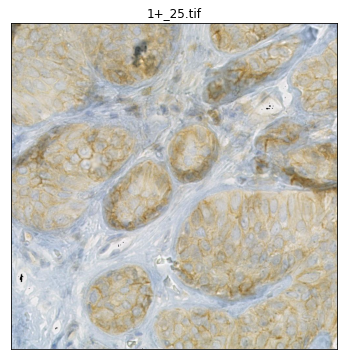

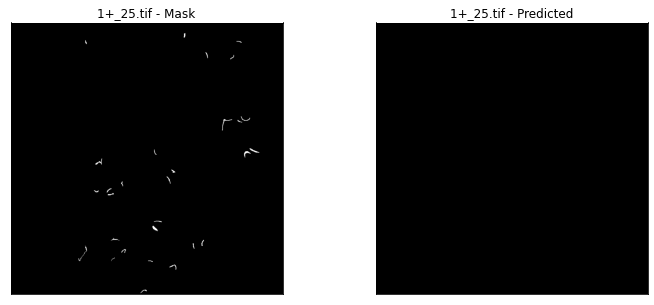

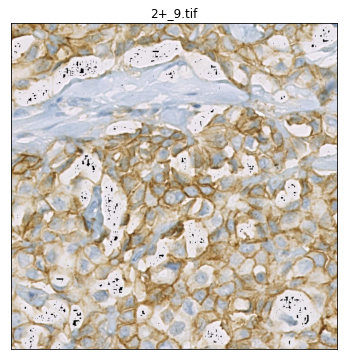

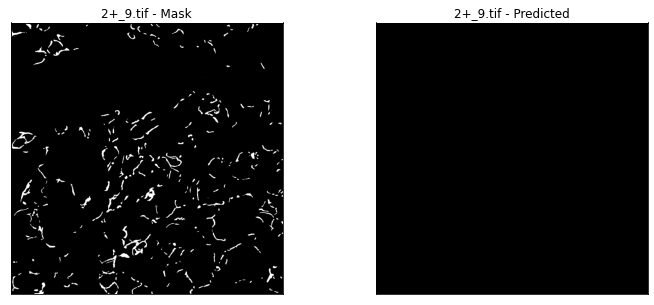

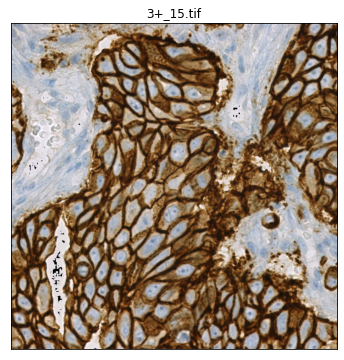

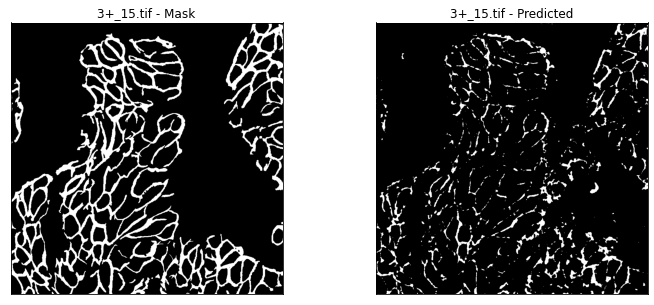

In [37]:
test_images = test_features.image.unique()
f2_predicted = []
for test_image in test_images:
    image_features = test_features[test_features.image == test_image]
    test_X_i, test_y_i = split_features_target(image_features, True)
    f2_predicted_i = predict(tree_2, test_X_i, features_fuzzy_sets, feature_names, target_names, tqdm_notebook)
    f2_predicted.append(f2_predicted_i)
    show_images_and_masks(test_image, image_features, f2_predicted_i)
    plt.show()
f2_predicted = np.hstack(f2_predicted)

In [38]:
results2=pd.DataFrame({
    "target": test_y.astype(int),
    "fuzzy": f2_predicted.astype(int),
})
results2.to_csv("fuzzy_results_imbalanced.csv", index=False)

In [39]:
print("Fuzzy Decision Tree - Imbalanced")
print(classification_report(results2["target"], results2["fuzzy"], target_names=["non-overexpression", "overexpression"]))

Fuzzy Decision Tree - Imbalanced
                    precision    recall  f1-score   support

non-overexpression       0.95      0.99      0.97   2781471
    overexpression       0.77      0.25      0.38    211306

          accuracy                           0.94   2992777
         macro avg       0.86      0.62      0.68   2992777
      weighted avg       0.93      0.94      0.93   2992777

